In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_train.shape

(8693, 14)

In [6]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
df_train.duplicated().sum()

0

In [11]:
df_train['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [12]:
df_train['Transported'].value_counts(normalize=True)*100

Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

In [13]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
print("HomePlanet: ",df_train['HomePlanet'].unique())
print("HomePlanet: ",df_train['HomePlanet'].nunique())

print("CryoSleep: ",df_train['CryoSleep'].unique())
print("CryoSleep: ",df_train['CryoSleep'].nunique())

print("Cabin: ",df_train['Cabin'].unique())
print("Cabin: ",df_train['Cabin'].nunique())

print("Destination: ",df_train['Destination'].unique())
print("Destination: ",df_train['Destination'].nunique())

print("Age: ",df_train['Age'].unique())
print("Age: ",df_train['Age'].nunique())

print("VIP: ",df_train['VIP'].unique())
print("VIP: ",df_train['VIP'].nunique())

print("RoomService: ",df_train['RoomService'].unique())
print("RoomService: ",df_train['RoomService'].nunique())

print("FoodCourt: ",df_train['FoodCourt'].unique())
print("FoodCourt: ",df_train['FoodCourt'].nunique())

print("ShoppingMall: ",df_train['ShoppingMall'].unique())
print("ShoppingMall: ",df_train['ShoppingMall'].nunique())

print("Spa: ",df_train['Spa'].unique())
print("Spa: ",df_train['Spa'].nunique())

print("VRDeck: ",df_train['VRDeck'].unique())
print("VRDeck: ",df_train['VRDeck'].nunique())

print("Name: ",df_train['Name'].unique())
print("Name: ",df_train['Name'].nunique())

print("Transported: ",df_train['Transported'].unique())
print("Transported: ",df_train['Transported'].nunique())

HomePlanet:  ['Europa' 'Earth' 'Mars' nan]
HomePlanet:  3
CryoSleep:  [False True nan]
CryoSleep:  2
Cabin:  ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Cabin:  6560
Destination:  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Destination:  3
Age:  [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
Age:  80
VIP:  [False True nan]
VIP:  2
RoomService:  [   0.  109.   43. ... 1569. 8586.  745.]
RoomService:  1273
FoodCourt:  [   0.    9. 3576. ... 3208. 6819. 4688.]
FoodCourt:  1507
ShoppingMall:  [   0.   25.  371. ... 1085.  510. 1872.]
ShoppingMall:  1115
Spa:  [   0.  549. 6715. ... 2868. 1107. 1643.]
Spa:  1327
VRDeck:  [   0.   44.   49. ... 1164.  971. 3235.]
VRDeck:  1306
Name:  ['Maha

In [15]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
### Handle the Missing Values

df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [18]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0])
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0])
df_train['Cabin'] = df_train['Cabin'].fillna('Unknown')
df_train['Destination'] = df_train['Destination'].fillna(df_train['Destination'].mode()[0])
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['VIP'] = df_train['VIP'].fillna(df_train['VIP'].mode()[0])
df_train['FoodCourt'] = df_train['FoodCourt'].fillna(0)
df_train['RoomService'] = df_train['RoomService'].fillna(0)
df_train['Spa'] = df_train['Spa'].fillna(0)
df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(0)
df_train['VRDeck'] = df_train['VRDeck'].fillna(0)
df_train['Name'] = df_train['Name'].fillna('Unknown')

/tmp/ipykernel_13/2395914506.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['CryoSleep'] = df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0])
/tmp/ipykernel_13/2395914506.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['VIP'] = df_train['VIP'].fillna(df_train['VIP'].mode()[0])


In [19]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [20]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [21]:
df_train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [22]:
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df_train[(df_train['Age'] < lower_bound) | (df_train['Age'] > upper_bound)]

print("Outliers: \n",outliers)


Outliers: 
      PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
109      0113_01      Earth      False    F/23/P    TRAPPIST-1e  64.0  False   
118      0126_01       Mars       True    F/27/S    TRAPPIST-1e  67.0  False   
248      0270_01      Earth      False    F/59/P    TRAPPIST-1e  63.0  False   
280      0310_01     Europa      False   Unknown    TRAPPIST-1e  67.0  False   
335      0377_01     Europa      False    C/15/S    55 Cancri e  63.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8254     8816_05     Europa      False   B/340/S    TRAPPIST-1e  64.0  False   
8288     8852_01       Mars       True   D/278/P    TRAPPIST-1e  76.0  False   
8369     8954_01      Earth      False  G/1452/P  PSO J318.5-22  73.0  False   
8516     9085_01     Europa      False    A/95/P    55 Cancri e  70.0  False   
8539     9118_02      Earth      False  G/1482/P    TRAPPIST-1e  64.0  False   

      RoomService  FoodCour

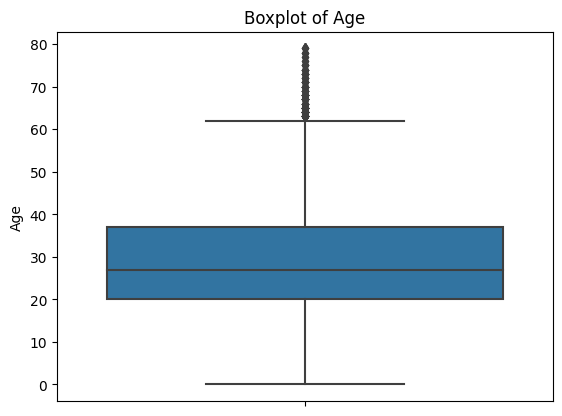

In [23]:
sns.boxplot(y=df_train['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [24]:
median_age = df_train['Age'].median()
df_train['Age'] = df_train['Age'].apply(lambda x:median_age if x< lower_bound or x>upper_bound else x)

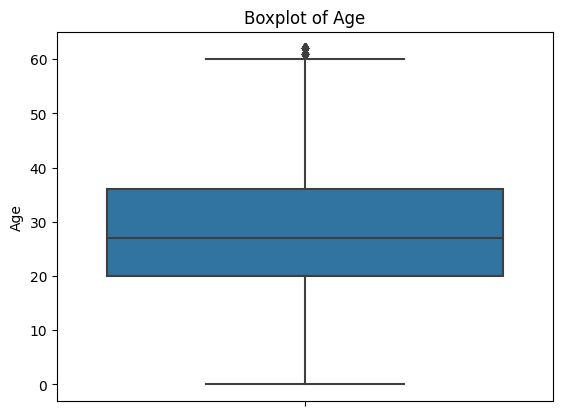

In [25]:
sns.boxplot(y=df_train['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [26]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
## Check Encoding


df_train['HomePlanet'].value_counts()


HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['HomePlanet'] = le.fit_transform(df_train['HomePlanet'])

In [29]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [30]:
df_train['CryoSleep'].value_counts()


CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [31]:
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)

In [32]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [33]:
df_train['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [34]:
df_train['Destination'] = le.fit_transform(df_train['Destination'])

In [35]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
df_train['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

In [37]:
df_train['VIP'] = df_train['VIP'].astype(int)

In [38]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
df_train['Transported'] = df_train['Transported'].astype(int)

In [40]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [41]:
df_train.drop('Name',axis=1,inplace=True)

In [42]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 883.0+ KB


In [44]:
df_train['Cabin'].value_counts()

Cabin
Unknown    199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: count, Length: 6561, dtype: int64

In [45]:
df_train.drop('Cabin', axis=1, inplace=True)

In [46]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [47]:
df_test= pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [48]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [49]:
## EDA Test Dataset